In [1]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv('../input/uci-ionosphere/ionosphere_data_kaggle.csv')
data.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [6]:
df = data.copy()
df['label'] = df['label'].map({'g': 0, 'b': 1})
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,0
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,1
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,0
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,1
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,0


In [18]:
df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)
print(df_train.shape, df_valid.shape)

(246, 35) (105, 35)


In [19]:
df_train = df_train.drop('feature2', axis=1) # drop the empty feature in column 2
df_valid = df_valid.drop('feature2', axis=1)

In [20]:
X_train = df_train.drop('label', axis=1)
X_valid = df_valid.drop('label', axis=1)
y_train = df_train['label']
y_valid = df_valid['label']
print(X_train.shape, y_train.shape)

(246, 33) (246,)


In [21]:
X_train.head()

,feature1,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,...,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
6,1,0.97588,-0.10602,0.94601,-0.208,0.92806,-0.28350,0.85996,-0.27342,0.79766,...,0.22792,-0.81634,0.13659,-0.82510,0.04606,-0.82395,-0.04262,-0.81318,-0.13832,-0.80975
52,1,1.00000,1.00000,1.00000,1.000,0.91010,1.00000,-0.26970,1.00000,-0.83152,...,0.90014,-1.00000,1.00000,-1.00000,1.00000,-1.00000,1.00000,-0.34686,1.00000,0.34845
114,1,0.91353,0.81586,-0.72973,1.000,-0.39466,0.55735,0.05405,0.29730,-0.18599,...,-0.00003,0.00002,-0.00001,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
45,0,0.00000,0.00000,0.00000,0.000,0.00000,0.00000,1.00000,1.00000,1.00000,...,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,1.00000,1.00000,0.00000,0.00000,0.00000
106,1,0.00000,0.00000,0.00000,0.000,0.00000,0.00000,0.00000,0.00000,0.62195,...,0.00000,0.00000,1.00000,0.10976,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


Data is ready, then we first use deep learning

In [22]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[33]),
    layers.Dense(4, activation='relu'),    
    layers.Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0, # hide the output because we have so many epochs
)

In [24]:
history_df = pd.DataFrame(history.history)
print(history_df.shape)
history_df.head()

(478, 4)


,loss,binary_accuracy,val_loss,val_binary_accuracy
0,0.689270,0.593496,0.654049,0.752381
1,0.687173,0.593496,0.651675,0.752381
2,0.685117,0.593496,0.649479,0.752381
3,0.683060,0.593496,0.647318,0.752381
4,0.681016,0.593496,0.645144,0.752381


In [26]:
column = history_df["binary_accuracy"]
max_value = column. max()
max_value

0.9552845358848572

Best Validation Loss: 0.3255
Best Validation Accuracy: 0.8762


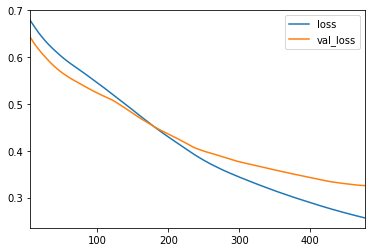

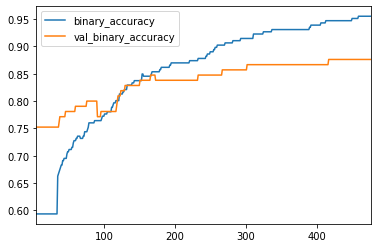

In [27]:
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))